### TEL354 - Minería de datos
# Taller 3

Nombre: Pedro Arce Cisternas

**Objetivo**

El objetivo del Taller 3 es encontrar reglas de decisión para clasificar animales en una de las 7 clases: `'Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado'`. 

El archivo contiene atributos binarios de 99 animales diferentes, donde `0` indica ausencia y `1` presencia de esa característica, con excepción de la columna `patas` que es numérica entre `0` y `8`.

1. Cargar los datos del archivo `animales.csv` a un DataFrame y mostrarlo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
animales_data = pd.read_csv('animales.csv')
animales_data

,animal,clase,pelo,plumas,huevos,leche,vuela,acuático,depredador,dentado,columna vertebral,respira,venenoso,aletas,patas,cola,doméstico
0,oso hormiguero,Mamífero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,antílope,Mamífero,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,bajo,Pez,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
3,oso,Mamífero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
4,jabalí,Mamífero,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,canguro,Mamífero,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
95,avispa,Insecto,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0
96,lobo,Mamífero,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
97,gusano,Invertebrado,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


2. Generar el conjunto `X` con todas las filas del DataFrame y todas las columnas con excepción de `animal` y `clase`.

In [3]:
X = animales_data.drop(columns=["animal", "clase"])

3. La variable objetivo `y` será la columna `clase`, pero mapeando cada categoría a un valor numérico según el diccionario `d`.

In [4]:
d = {'Mamífero': 1,
 'Ave': 2,
 'Reptil': 3,
 'Pez': 4,
 'Anfibio': 5,
 'Insecto': 6,
 'Invertebrado': 7}

In [5]:
y = animales_data['clase'].map(d)

4. Separar los datos en conjuntos de entrenamiento (`X_train`, `y_train`) y testing (`X_test`, `y_test`) usando la función `train_test_split()` con `test_size=0.1`.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

5. Entrenar un modelo de clasificación de tipo `DecisionTreeClassifier` con los datos de entrenamiento.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

6. Predecir sobre el conjunto de testing `X_test` usando la función `predict()` y generar el vector `y_pred` con el resultado de la predicción.

In [10]:
y_pred = clf.predict(X_test)

7. Mostrar el `accuracy_score` del modelo sobre los datos de testing `y_test`.

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


8. Entregar la Matriz de Confusión e indicar que clases de animales confunde el modelo.

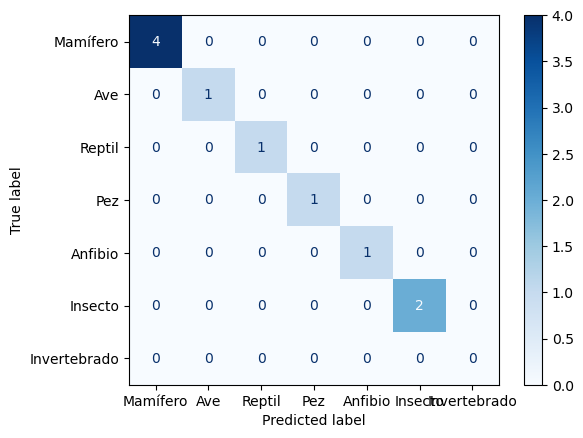

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=list(d.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=list(d))
disp.plot(cmap="Blues")
plt.show()

n_clases = len(animales_data['clase'].unique())
confused_classes = set()
for i in range(n_clases):
    for j in range(n_clases):
        if i != j and cm[i, j] > 0:
            confused_classes.add(list(d)[i])
            confused_classes.add(list(d)[j])

if len(confused_classes) > 0: 
    print("Clases de animales confundidas por el modelo:", confused_classes)

## Las clases de animales que confunden el modelo son las representadas por los valores fuera de la diagonal principal.
## Si en el resultado de la matriz solo hay "0" al rededor de la diagonal, indicaque no hay clases 
### de animales que confundan el modelo presentado. Esto también se ve representado en el accuracy_score del modelo, 
### el cual de no ser igual a 1 quiere decir que hay clases que confunden el modelo.
## (Esta matriz variará cada vez que se reinicie el kernel del archivo, por lo cual también variaran las clases de animales
### que confundan el modelo).

9. Plotear el árbol de decisión con la función `plot_tree()`, cuyo primer parámetro es el clasificador y luego:
- El parámetro `feature_names` son los nombres de las columnas en el conjunto `X`.
- El parámetro `class_names` es una lista con las clases de animales, en este orden: `'Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado'`. 
- El parámetro `filled`, permite de manera opcional, colorear los nodos de la misma clase si se iguala a `True`.

Asegúrese de establecer un tamaño adecuado para que el gráfico se vea (Por ejemplo, `figsize=(25, 20)`).

In [14]:
from sklearn.tree import plot_tree

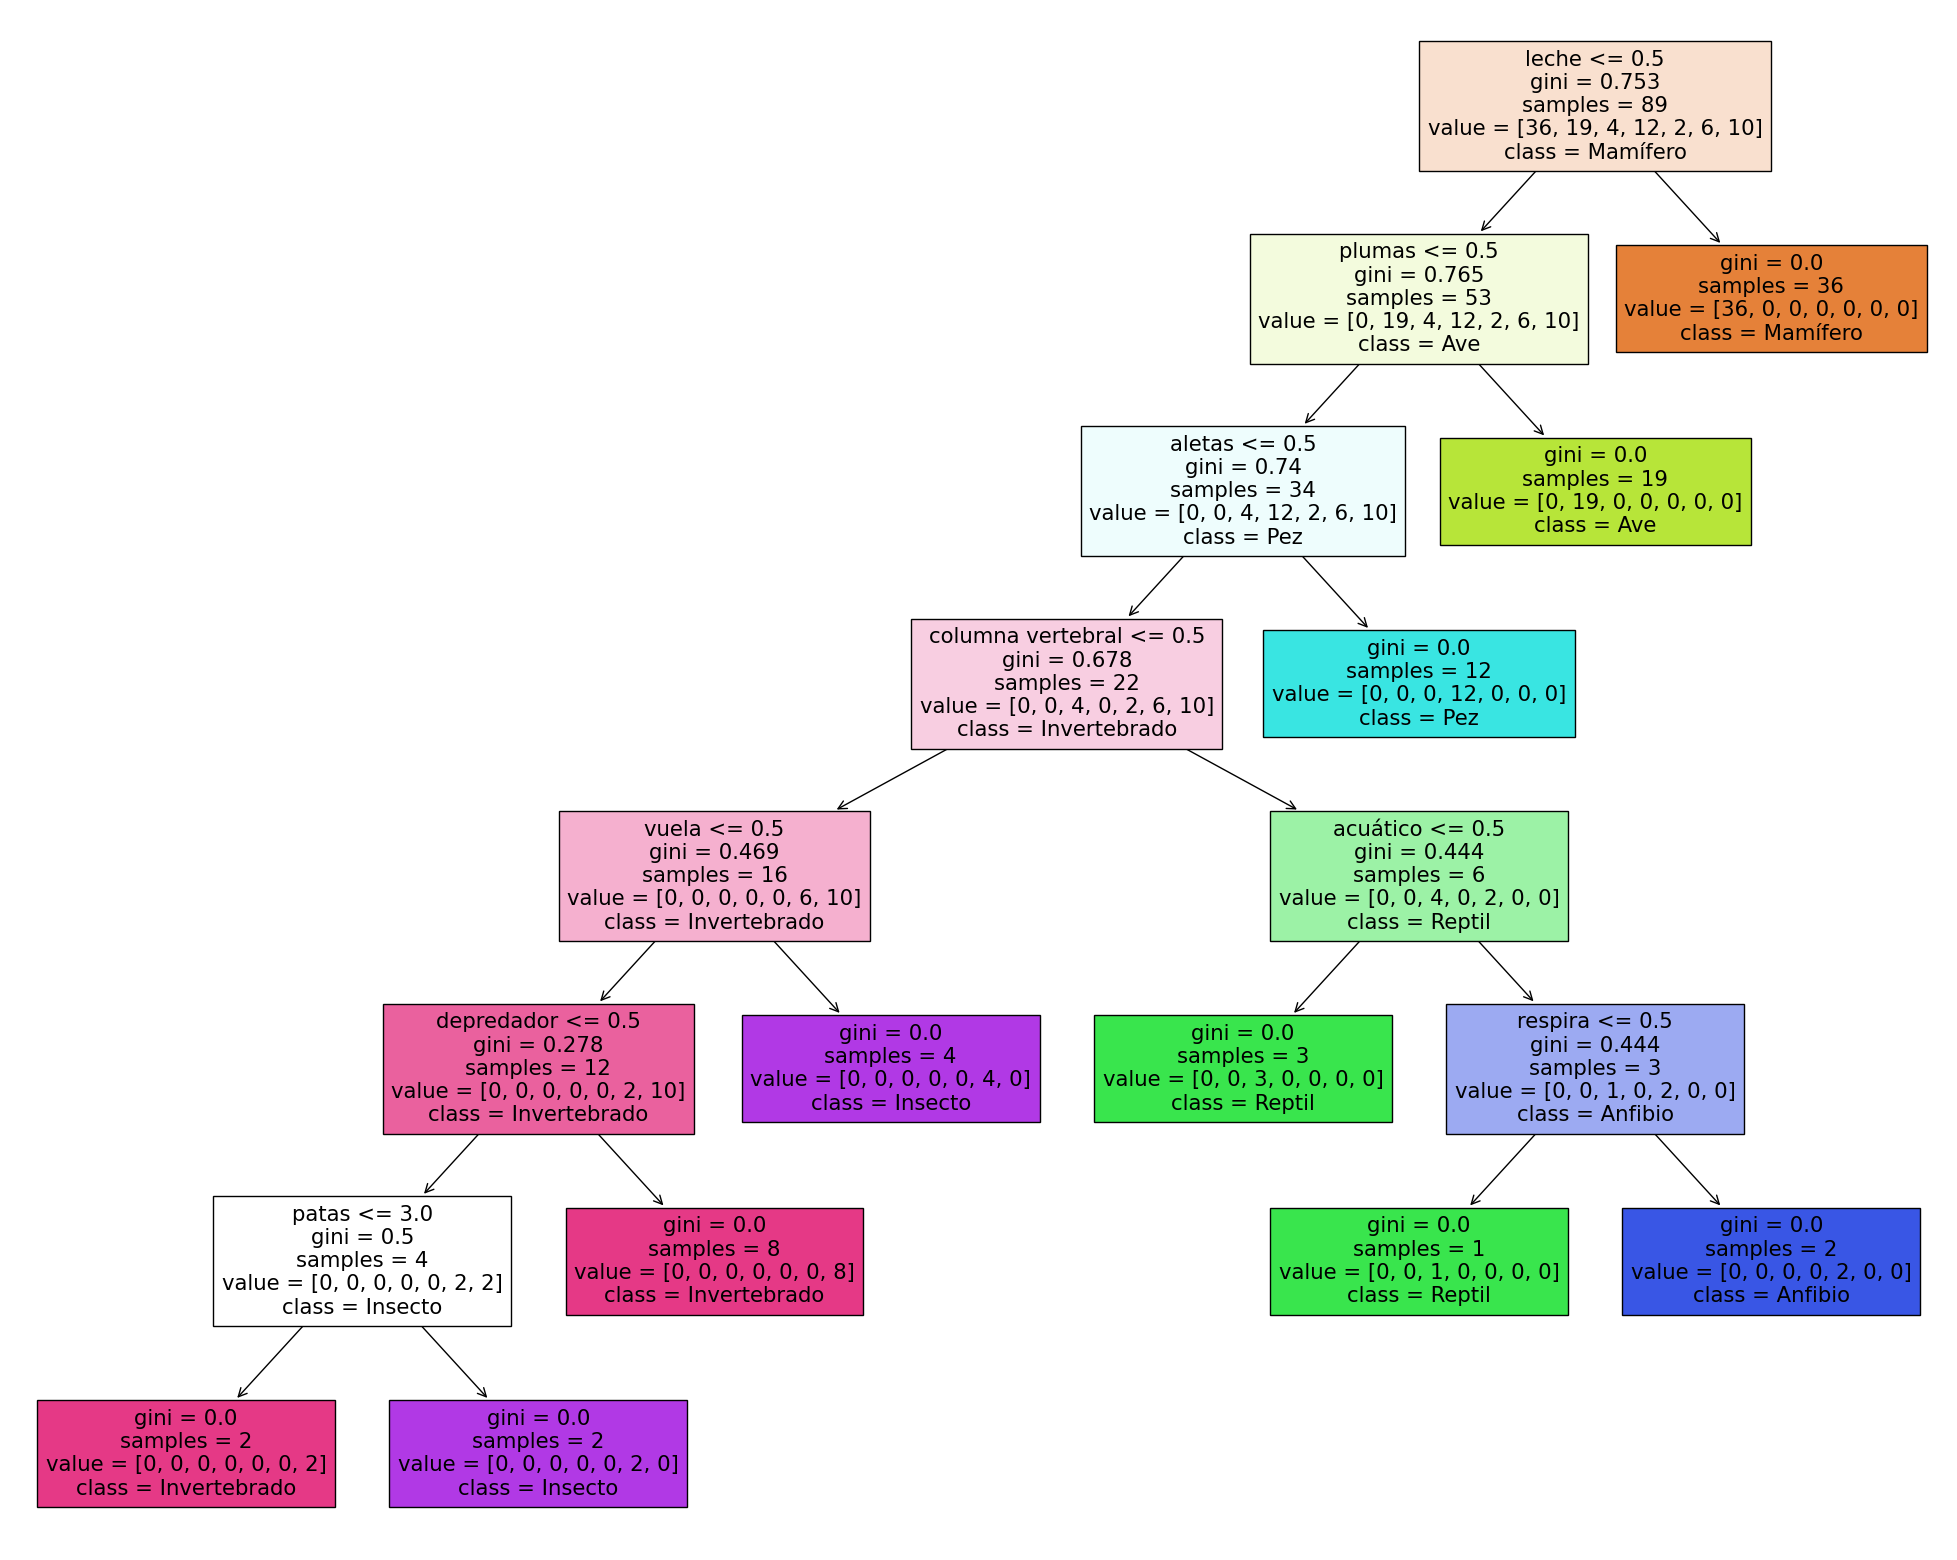

In [15]:
plt.figure(figsize=(25, 20))
clases = ['Mamífero', 'Ave', 'Reptil', 'Pez', 'Anfibio', 'Insecto', 'Invertebrado']
plot_tree(clf, feature_names=X.columns, class_names=clases, filled=True)
plt.show()

10. Para cada hoja del árbol, entregue el número de animales en esa clase, indicando el porcentaje con respecto al total, y las condiciones que se deben cumplir para pertenecer a esa clase. Por ejemplo:

- 36 mamíferos dan leche, lo que representa el 100% de esta clase.
- 6 insectos no dan leche, no tienen plumas, no tienen aletas y vuelan, lo que representa el 85.71% de esta clase.
- ...

In [20]:
samples_por_clase = animales_data['clase'].value_counts()
samples_por_clase

Mamífero        40
Ave             20
Pez             13
Invertebrado    10
Insecto          8
Reptil           5
Anfibio          3
Name: clase, dtype: int64

In [ ]:
## 36 mamíferos dan leche, lo que representa el 90% de esta clase.

## 19 aves no dan leche y tienen plumas, lo que representa el 95% de esta clase.

## 12 peces no dan leche, no tienen plumas y tienen aletas, lo que representa el 92,31% de esta clase.

## 4 insectos no dan leche, no tienen plumas, no tienen aletas, no tienen columna vertebral y vuelan, lo que representa
### el 50% de esta clase.

## 3 reptiles no dan leche, no tienen plumas, no tienen aletas, tienen columna vertebral y no son acuáticos, 
### lo que representa el 60% de esta clase.

## 8 invertebrados no dan leche, no tienen plumas, no tienen aletas, no tienen columna vertebral, no vuelan y son depredadores, 
### lo que representa el 80% de esta clase.

## 1 reptil no da leche, no tiene plumas, no tiene aletas, tiene columna vertebral, es acuático y no respira, 
### lo que representa el 20% de esta clase.

## 2 anfibios no dan leche, no tienen plumas, no tienen aletas, tienen columna vertebral, son acuáticos y respiran, 
### lo que representa el 66,67% de esta clase.

## 2 invertebrados no dan leche, no tienen plumas, no tienen aletas, no tienen columna vertebral, no vuelan, 
### no son depredadores y no tienen patas, lo que representa el 20% de esta clase.

## 2 insectos no dan leche, no tienen plumas, no tienen aletas, no tienen columna vertebral, no vuelan, 
### no son depredadores y tienen patas, lo que representa el 25% de esta clase.